import section

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import re

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)
nltk.download()
nltk.download('stopwords')
%matplotlib inline

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
filtered_df = df[df['review'].str.len() < 500]

In [5]:
filtered_df.head(10)

,review,sentiment
9,"If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",positive
14,This a fantastic movie of three prisoners who become famous. One of the actors is george clooney and I'm not a fan but this roll is not bad. Another good thing about the movie is the soundtrack (The man of constant sorrow). I recommand this movie to everybody. Greetings Bart,positive
22,"What an absolutely stunning movie, if you have 2.5 hrs to kill, watch it, you won't regret it, it's too much fun! Rajnikanth carries the movie on his shoulders and although there isn't anything more other than him, I still liked it. The music by A.R.Rehman takes time to grow on you but after you heard it a few times, you really start liking it.",positive
36,"The plot is about the death of little children. Hopper is the one who has to investigate the killings. During the movie it appears that he has some troubles with his daughter. In the end the serial killer get caught. That's it. But before you find out who dunnit, you have to see some terrible acting by all of the actors. It is unbelievable how bad these actors are, including Hopper. I could go on like this but that to much of a waste of my time. Just don't watch the movie. I've warned you.",negative
46,Protocol is an implausible movie whose only saving grace is that it stars Goldie Hawn along with a good cast of supporting actors. The story revolves around a ditzy cocktail waitress who becomes famous after inadvertently saving the life of an Arab dignitary. The story goes downhill halfway through the movie and Goldie's charm just doesn't save this movie. Unless you are a Goldie Hawn fan don't go out of your way to see this film.,negative
53,"I cannot believe I enjoyed this as much as I did. The anthology stories were better than par, but the linking story and its surprise ending hooked me. Alot of familiar faces will keep you asking yourself ""where I have I seen them before?"" Forget the running time listed on New Line's tape, this ain't no 103 minutes, according to my VCR timer and IMDB. Space Maggot douses the campfire in his own special way and hikes this an 8.",positive
63,"Besides being boring, the scenes were oppressive and dark. The movie tried to portray some kind of moral, but fell flat with its message. What were the redeeming qualities?? On top of that, I don't think it could make librarians look any more unglamorous than it did.",negative
84,"We brought this film as a joke for a friend, and could of been our worst joke to play. The film is barely watchable, and the acting is dire. The worst child actor ever used and Hasslehoff giving a substandard performance. The plot is disgraceful and at points we was so bored we was wondering what the hell was going on. It tries to be gruesome in places but is just laughable.<br /><br />Just terrible",negative
112,It's terrific when a funny movie doesn't make smile you. What a pity!! This film is very boring and so long. It's simply painfull. The story is staggering without goal and no fun.<br /><br />You feel better when it's finished.,negative
117,"Usually I'm a bit of a fan of the bad eighties & early nineties film featuring now has beens...but this film is so incredibly terrible that it was a real endurance test to sit through. Guys dressing up as girls has been done to death - but never so pathetically. Corey Haim's performance was abysmal as usual, Nicole Eggert was not much better. This has no redeeming qualities, even if you are a number #1 fan of an actor/actress in this piece of trash - stay away!",negative


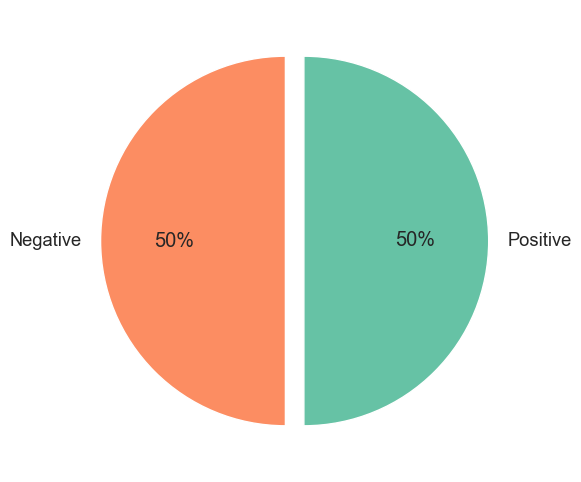

In [6]:

sns.set(font_scale = 1.2)
plt.figure(figsize=(6,6))
plt.pie(
    df['sentiment'].value_counts(), 
    labels=["Positive", "Negative"], 
    autopct='%1.0f%%', 
    colors=sns.color_palette('Set2'),
    startangle=90,
    counterclock=False,
    explode=[0.05, 0.05])
plt.show()

In [7]:
le = preprocessing.LabelEncoder()
df['sentiment'] = le.fit_transform(df.sentiment.values)

In [8]:
df.head(1)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1


In [9]:
df['Length'] = df['review'].str.len() 

In [10]:
def word_count(review): 
    review_list = review.split() 
    return len(review_list) 

In [11]:
df['Word_count'] = df['review'].apply(word_count) 

In [12]:
df['mean_word_length'] = df['review'].map(lambda rev: np.mean([len(word) for word in rev.split()])) 

In [13]:
df['mean_sent_length'] = df['review'].map(lambda rev: np.mean([len(sent) for sent in sent_tokenize(rev)])) 

In [14]:
df.head(2)

,review,sentiment,Length,Word_count,mean_word_length,mean_sent_length
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1,1761,307,4.739414,175.200000
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",1,998,162,5.166667,141.714286


In [15]:
def ratings(rating): 
    if rating==0: 
        return "Negative" 
    if rating==1: 
        return "Positive" 

In [16]:
df['sentiment'] = df['sentiment'].apply(ratings) 

In [17]:
def visualize(col): 
    plt.subplot(1,2,1) 
    sns.boxplot(y=df[col], hue=df['sentiment']) 

    plt.ylabel(col, labelpad=12.5) 
    plt.subplot(1,2,2) 

    sns.kdeplot(x=df[col] , hue= df['sentiment'] )   # 

    plt.legend(df['sentiment'].unique()) 
    plt.xlabel('') 
    plt.ylabel('') 
    plt.show() 

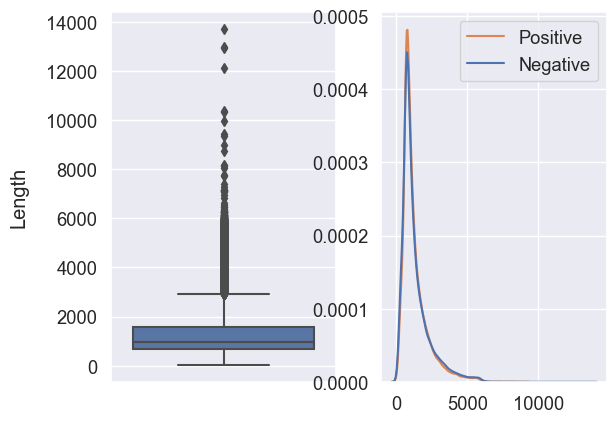

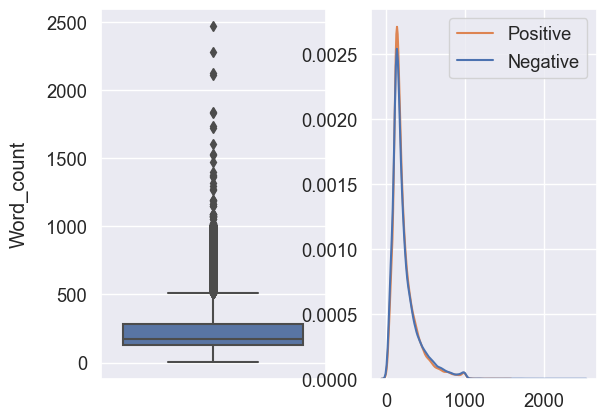

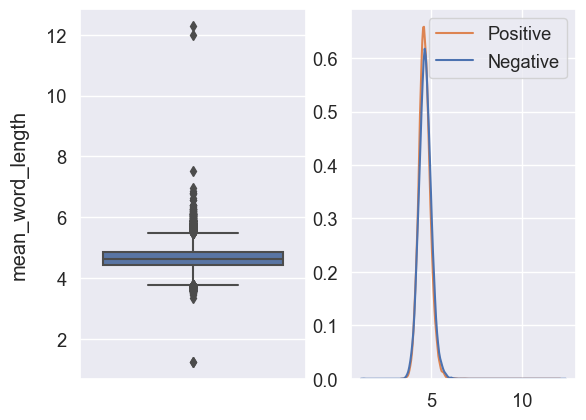

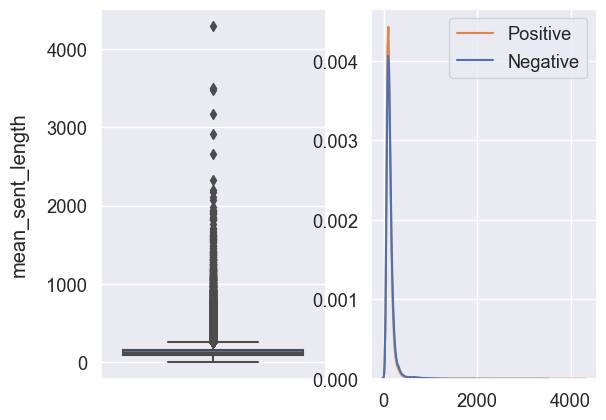

In [18]:
features = df.columns.tolist()[2:] 

for feature in features: 

    visualize(feature) 

In [31]:
stop = set(stopwords.words('english'))
# stopwords = set(STOPWORDS) 

In [32]:
def clean(review): 
    review = review.lower() 
    review = re.sub('[^a-z A-Z 0-9-]+', '', review) 
    review = " ".join([word for word in review.split() if word not in stop ]) 
    return review 
df['review'] = df['review'].apply(clean) 

In [20]:
def preprocess_reviews(df): 
    corpus=[] 
    stem=PorterStemmer() 
    lem=WordNetLemmatizer() 
    for news in df['review']: 
        words=[w for w in word_tokenize(news) if (w not in stopwords)] 
        words=[lem.lemmatize(w) for w in words if len(w)>2] 
        corpus.append(words) 
    return corpus

In [21]:
def show_wordcloud(data): 

    wordcloud = WordCloud( 
        background_color='white', 
        stopwords=stopwords, 
        max_words=100, 
        max_font_size=30, 
        scale=3, 
        random_state=1) 
    
    wordcloud=wordcloud.generate(str(data)) 

    fig = plt.figure(1, figsize=(12, 12)) 
    plt.axis('off') 

    plt.imshow(wordcloud) 
    plt.show() 

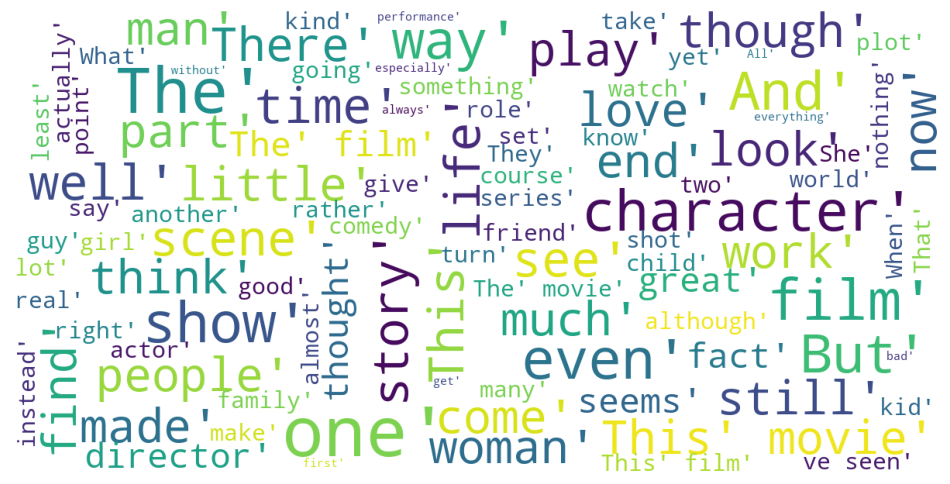

In [22]:
corpus=preprocess_reviews(df) 

show_wordcloud(corpus) 

<Axes: title={'center': 'Top 20 Bigrams in reviews '}, xlabel='ReviewText'>

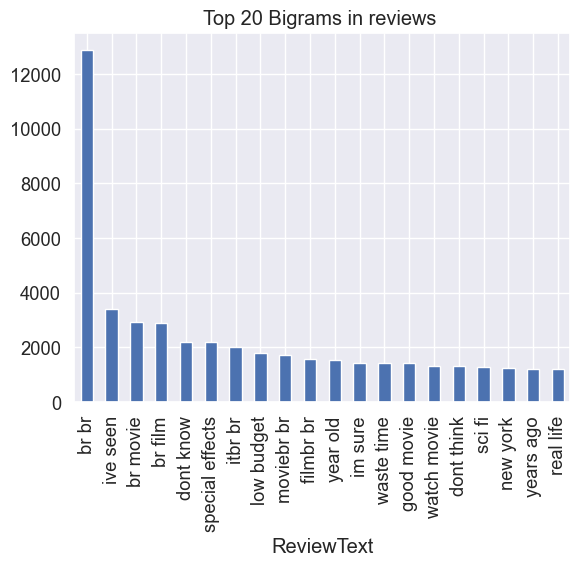

In [27]:
def get_top_n_bigram(corpus, n=None): 

    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
    return words_freq[:n] 

common_words = get_top_n_bigram(df['review'], 20) 


df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count']) 
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 Bigrams in reviews ') 

<Axes: title={'center': 'Top 20 Trigrams in reviews '}, xlabel='ReviewText'>

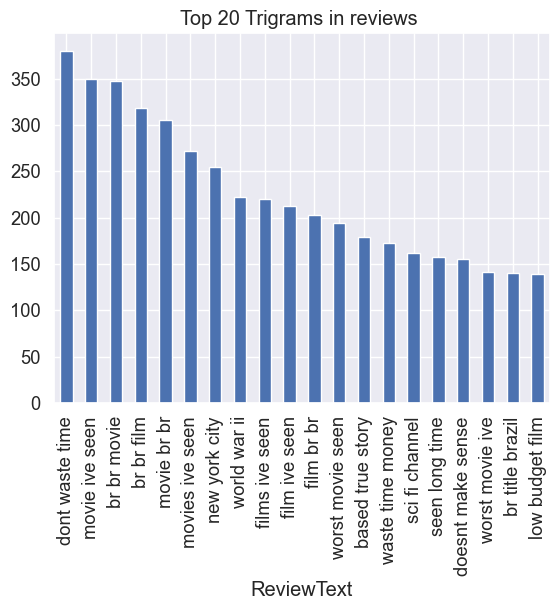

In [28]:
def get_top_n_trigram(corpus, n=None): 

    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
    return words_freq[:n] 

common_words = get_top_n_trigram(df['review'], 20) 

df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count']) 
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 Trigrams in reviews ')  